In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [4]:
df = pd.read_csv("data1.csv")
print(df.head(20))
df.drop_duplicates()
print(df['id'].unique().shape)

    id city_name    signup_os signup_channel signup_date bgc_date  \
0    1    Strark      ios web           Paid      1/2/16      NaN   
1    2    Strark      windows           Paid     1/21/16      NaN   
2    3   Wrouver      windows        Organic     1/11/16  1/11/16   
3    4    Berton  android web       Referral     1/29/16   2/3/16   
4    5    Strark  android web       Referral     1/10/16  1/25/16   
5    6    Strark  android web       Referral     1/18/16  1/18/16   
6    7    Strark      ios web           Paid     1/14/16  1/16/16   
7    8    Strark      ios web       Referral     1/26/16   2/5/16   
8    9    Strark          NaN       Referral      1/5/16      NaN   
9   10    Berton      ios web           Paid     1/25/16      NaN   
10  11    Strark      ios web       Referral     1/18/16   2/9/16   
11  12    Berton          mac           Paid      1/4/16      NaN   
12  13    Strark  android web       Referral     1/12/16  1/12/16   
13  14    Strark      ios web     

In [5]:
first_trip_df = df.dropna(subset = ['first_completed_date'])
first_trip_df.shape

(6137, 11)

In [6]:
df['Completed_drive'] = df['first_completed_date'].apply(lambda x: True if pd.notnull(x) else False)
agg_data = df.groupby(['city_name', 'Completed_drive']).size().unstack()
percentage_data = agg_data.div(agg_data.sum(axis=1), axis=0) * 100
print(df['Completed_drive'].unique())
print(first_trip_df.shape[0] / df.shape[0])

[False  True]
0.11223276823759624


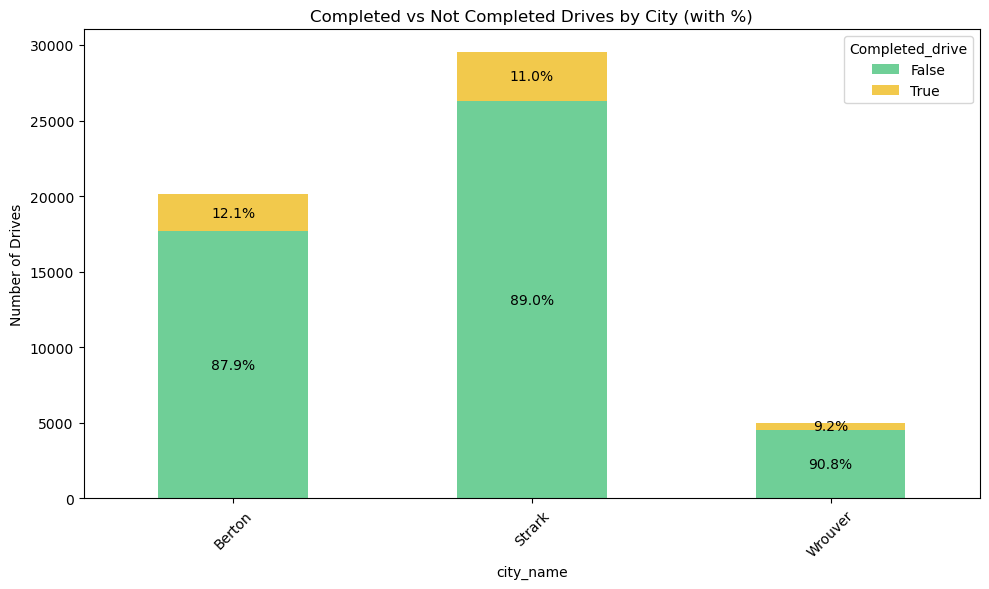

In [7]:
colors = ['#6FCF97', '#F2C94C', '#56CCF2']  # customize as you like

ax = agg_data.plot(kind="bar", stacked=True, figsize=(10, 6), color = colors)

for i, city in enumerate(agg_data.index):
    y_offset = 0
    for val in agg_data.columns:
        count = agg_data.loc[city, val]
        percent = percentage_data.loc[city, val]
        
        if count > 0:
            ax.text(i, y_offset + count / 2, f'{percent:.1f}%', ha='center', va='center', fontsize=10)
        
        y_offset += count

plt.ylabel("Number of Drives")
plt.title("Completed vs Not Completed Drives by City (with %)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
df_true = df[df['Completed_drive'] == True].groupby('signup_channel').size().reset_index(name='Count')

df_stacked = df.groupby(['signup_channel', 'Completed_drive']).size().reset_index(name='Count')

ordered_channels = ['Paid', 'Organic', 'Referral']

chart_true = alt.Chart(df_true).mark_bar().encode(
    x=alt.X('signup_channel:N', sort=ordered_channels, title='Signup Channel'),
    y=alt.Y('Count:Q', title='Completed Drive = True'),
    color=alt.Color('signup_channel:N', scale=alt.Scale(range=['#1f77b4', '#ff7f0e', '#2ca02c']), title='Signup Channel'),
    tooltip=['signup_channel', 'Count']
).properties(
    width=300,
    height=200,
    title='Drivers with Completed Drive Only'
)

chart_stacked = alt.Chart(df_stacked).mark_bar().encode(
    x=alt.X('signup_channel:N', sort=ordered_channels, title='Signup Channel'),
    y=alt.Y('Count:Q', title='Total Drivers'),
    color=alt.Color('Completed_drive:N', title='Completed Drive'),
    tooltip=['signup_channel', 'Completed_drive', 'Count']
).properties(
    width=300,
    height=200,
    title='Completed vs Not Completed Drives (Stacked)'
)

# Combine the two charts vertically
final_chart = alt.hconcat(chart_true, chart_stacked)
final_chart

alt.HConcatChart(...)

In [9]:
print(f'Paid: {1482/(22456+1482)*100:.2f}%')
print(f'Organic: {1210/(12217+1210)*100:.2f}%')
print(f'Referral: {3445/(13871+3445)*100:.2f}%')

Paid: 6.19%
Organic: 9.01%
Referral: 19.89%


In [10]:
# correlation matrix w panda(by city?)
print(df.head(20))
city_map = {'Strark': 0, 'Wrouver': 1, 'Berton': 2}
df['city_name'] = df['city_name'].map(city_map).dropna()
os_map = {'ios web': 0, 'windows': 1, 'android web': 2, 'mac': 3, 'other': 4}
df['signup_os'] = df['signup_os'].map(os_map).dropna()
channel_map = {'Paid': 0, 'Organic': 1, 'Referral': 2}
df['signup_channel'] = df['signup_channel'].map(channel_map).dropna()
df['bgc_date'] = pd.to_datetime(df['bgc_date'], dayfirst=True, errors='coerce')
df['bgc_date'] = (df['bgc_date'] - pd.Timestamp("2016-01-01")).dropna()
df['signup_date'] = pd.to_datetime(df['signup_date'], dayfirst=True, errors='coerce')
df['signup_date'] = (df['signup_date'] - pd.Timestamp("2016-01-01")).dropna()
df['vehicle_added_date'] = pd.to_datetime(df['vehicle_added_date'], dayfirst=True, errors='coerce')
df['vehicle_added_date'] = (df['vehicle_added_date'] - pd.Timestamp("2016-01-01")).dropna()
df['Completed_drive'] = df['first_completed_date'].apply(lambda x: 1 if pd.notnull(x) else 0)
df = df.drop(['first_completed_date'], axis=1)

df_filtered = df.drop(columns=['vehicle_make', 'vehicle_model', 'group'])
df_filtered.corr(method='pearson', min_periods=1, numeric_only=False)

    id city_name    signup_os signup_channel signup_date bgc_date  \
0    1    Strark      ios web           Paid      1/2/16      NaN   
1    2    Strark      windows           Paid     1/21/16      NaN   
2    3   Wrouver      windows        Organic     1/11/16  1/11/16   
3    4    Berton  android web       Referral     1/29/16   2/3/16   
4    5    Strark  android web       Referral     1/10/16  1/25/16   
5    6    Strark  android web       Referral     1/18/16  1/18/16   
6    7    Strark      ios web           Paid     1/14/16  1/16/16   
7    8    Strark      ios web       Referral     1/26/16   2/5/16   
8    9    Strark          NaN       Referral      1/5/16      NaN   
9   10    Berton      ios web           Paid     1/25/16      NaN   
10  11    Strark      ios web       Referral     1/18/16   2/9/16   
11  12    Berton          mac           Paid      1/4/16      NaN   
12  13    Strark  android web       Referral     1/12/16  1/12/16   
13  14    Strark      ios web     

/var/folders/0b/kbxw3yp15078rb4blsyr1khw0000gn/T/ipykernel_18110/1368090098.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['bgc_date'] = pd.to_datetime(df['bgc_date'], dayfirst=True, errors='coerce')
/var/folders/0b/kbxw3yp15078rb4blsyr1khw0000gn/T/ipykernel_18110/1368090098.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['signup_date'] = pd.to_datetime(df['signup_date'], dayfirst=True, errors='coerce')
/var/folders/0b/kbxw3yp15078rb4blsyr1khw0000gn/T/ipykernel_18110/1368090098.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['vehicle_added_date'] = p

KeyError: "['group'] not found in axis"